<h1> Analyzing Top Salaries in Computer Science: Who Earns the Most? </h1>
    by Almamy Bah and Oscar Herrera
    
<h2> Introduction </h2> 

This project will walk you through the entire data science pipeline using a database of over 62,000 salary records from top companies. The dataset contains much valuable data such as base salary, total yearly compensation, education level, race, gender, location, etc. First, we will do data collection where we use pandas to import the database into Juypter notebook. Then, we will do some data curation to see which columns will be useful for our process and remove the unnecessary data. Also, we will see how to handle missing data. In this tutorial, we will take care of missing data imputation but more on that later. After all the data processing and cleaning, we will do some exploratory analysis of the data to outline the characteristics of this dataset. Finally, we will do hypothesis testing and machine learning to provide an analysis and interpretation of the data.

<b>Motivation for the topic:</b>

After graduating, a sizable percentage of undergraduate students join the workforce without having a basic understanding of the earning potential of their learned talents. This is especially true for those studying computer science who aren't sure what career path to take. It is crucial that these students have access to trustworthy information about the financial possibilities for various career pathways, including data science, cyber security, and software engineering, as compensation is one of the most crucial aspects in employment selection.
By using the data science pipeline to examine the available data, our goal is to give computer science students the greatest financial options possible. Through an examination of average pay for various job titles, degrees of expertise, and organizations, we will look into how to maximize their earning potential. Furthermore, by investigating which states offer the best incomes for a certain degree, we will examine how geography influences income. We will also look at non-job-related variables like ethnicity, gender, and educational attainment that could have an ongoing impact on income.
By providing comprehensive and accurate information, our aim is to assist computer science students in making informed decisions about their future career paths and maximizing their earning potential. Ultimately, we believe that this will help to create a more equitable and prosperous job market for all computer science graduates.

<b> Before you start </b>

Here are some links that may be useful before you dive into the project. 
<br>
<a href="https://www.docker.com/products/docker-desktop/"> Download Docker  </a> <br>
<a href="https://www.youtube.com/watch?v=H9Iu49E6Mxs&t=2s&ab_channel=ColtSteele"> Juypter Notebook in 10 minutes </a> <br>
<a href="https://www.bls.gov/ooh/computer-and-information-technology/computer-and-information-research-scientists.htm#:~:text=in%20May%202021.-,Job%20Outlook,on%20average%2C%20over%20the%20decade."> U.S. BUREAU OF LABOR STATISTICS </a>



<h1> Data Collection </h1>

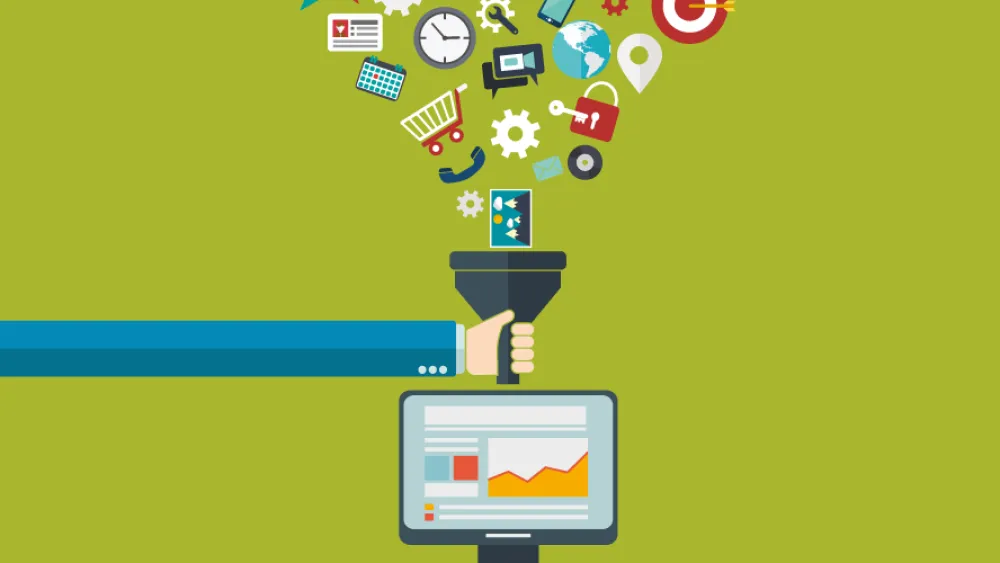

<b> What is data collection? </b>
    
<a href="https://ori.hhs.gov/education/products/n_illinois_u/datamanagement/dctopic.html#:~:text=Data%20Collection,test%20hypotheses%2C%20and%20evaluate%20outcomes.Data"> "Data collection </a> is the process of gathering and measuring information on variables of interest, in an established systematic fashion that enables one to answer stated research questions, test hypotheses, and evaluate outcomes."

<b> What are different ways to collect data? </b>
<ul>
    <li> Direct download and load from local storage </li>
    <li> Generate locally via downloaded code (e.g., simulation)</li>
    <li> Query data from a database </li>
    <li> Query an API from the intra/internet </li>
    <li> Scrape data from a webpage</li>
</ul>



For this step, we obtained our data from a direct download and load from local storage. More specifically, we looked into a dataset from Kaggle related to Data Science and Stem Salaries. It contains more than 62,000 salary records from top companies. It contains useful data such as gender, race, level of experience, base salary etc., and we think this is enough for our tutorial. The data set can be found <a href= https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries> here </a>.




First, we will import the libraries we will use for the project. All these libraries will be useful to us later on as well.

<b> Note: run "pip install missingno" and "pip install plotly" in your docker container
    before importing these libraries</b>

In [ ]:
!pip install missingno
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

Then, we will use pandas to import the dataset from our file.

Notice that the file name is "final_data.csv". We named the file this for convenience but the file name could be anything. Also, we could have used a URL to gather raw data instead of downloading the CSV file directly from the web. That just goes to show how many ways you can collect data to run an analysis. 

In [ ]:
db = pd.read_csv("final_data.csv")

#Here head will just show us the first couple of rows in a presentable manner.
db.head()

<h2> Data Processing </h2>

One thing to notice about our dataset is that there are a lot of columns that seem redundant.

For example, instead of having a separate column for Doctorate_Degree, Highschool, Some_College, Bachelors, and Masters, we can just have one column named Education which can be used instead. We can do the same for the race column.



In [ ]:
db = db.drop("Masters_Degree", axis=1)
db = db.drop("Bachelors_Degree", axis=1)
db = db.drop("Doctorate_Degree", axis=1)
db = db.drop("Highschool", axis=1)
db = db.drop("Some_College", axis=1)
db = db.drop("Race_Asian", axis=1)
db = db.drop("Race_White", axis=1)
db = db.drop("Race_Two_Or_More", axis=1)
db = db.drop("Race_Black", axis=1)
db = db.drop("Race_Hispanic", axis=1)

These remaining columns are also not useful for this project since we won't analyze this data. So, we will just drop these columns.

In [ ]:
db = db.drop("yearsatcompany", axis=1)
db = db.drop("tag", axis=1)
db = db.drop("cityid", axis=1)
db = db.drop("otherdetails", axis=1)
db = db.drop("dmaid", axis=1)
db = db.drop("rowNumber", axis=1)

db.head()

<b> <u> This dataset is looking much better! </u> </b>

We want an easy way to tell where the highest salaries are located by the state. Let's modify the location column to only include the abbreviation of the state in this column.

In [ ]:
# First we modify the location column to contain only regions inside the United States.

us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
#us_data = df[df['location'].str[-2:].isin(us_states)]

for index, row in db.iterrows():
    if row['location'][-2:] in us_states:
        db.loc[index,'location'] = row['location'][-2:]
    else:
        db.loc[index,'location'] = np.nan


db.head()

One thing to notice is how many NaN values we have for gender, race, and education. 

We will dive deeper into how to deal with this missing data.

In [ ]:
msno.matrix(db)
plt.show()
db.isna().sum()


Here, we can use the missingno library to have a better visual representation where the data is null. As you can see, we have a decent amount of missing data. There are 19540 missing values for gender, 40215 values missing for race, and 32272 values missing for education. 


<b> Why do we care about missing data? </b>

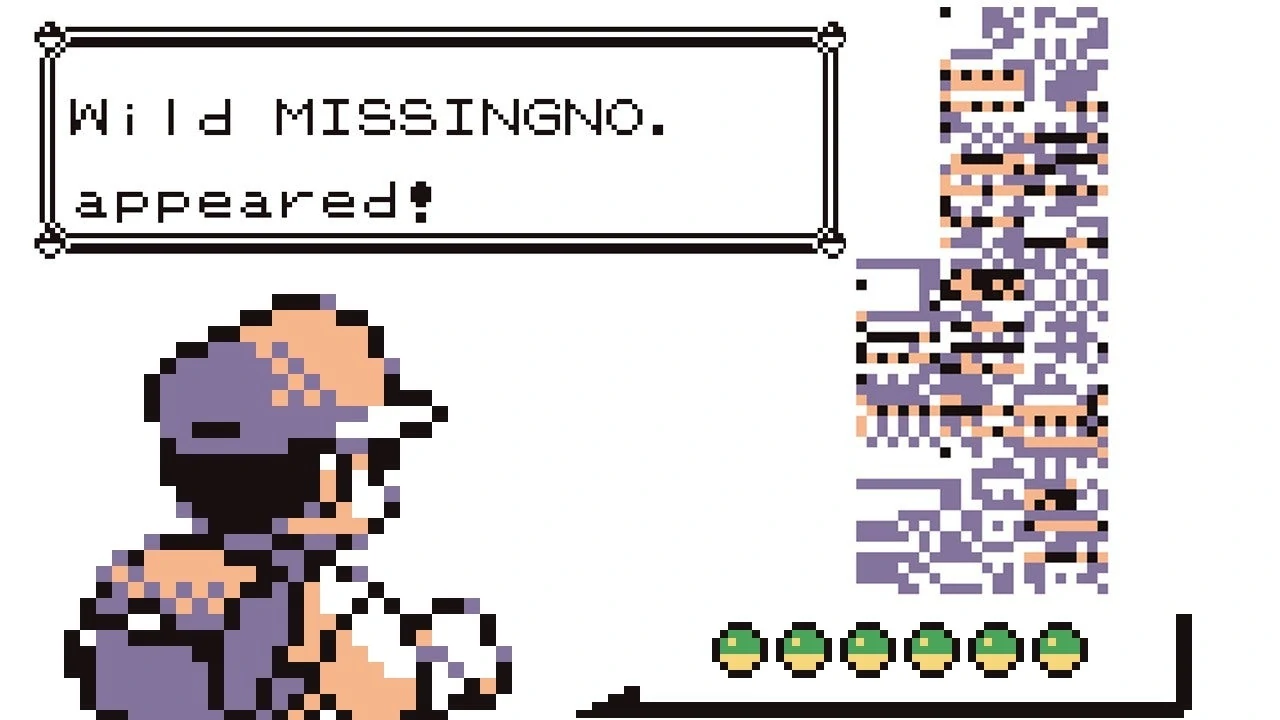

Getting rid of all the rows with missing information might bias our sample and lead to a variance larger than reflected by the size of our data. From our understanding, this data is not missing completely at random. Therefore we will fill it using the imputation technique.

<b> What can we do about missing data? </b>

As said before we could drop the missing rows from our dataset, but as we saw in the graphic there are a lot of missing values from different rows, and therefore it may not be the most optimal solution. The next option would be to do imputation. There are many different forms of imputation such as single imputation methods such as mean/mode/median imputation, and regression imputation, and there are also multiple imputation methods. In the case of our dataset, we will assign the missing values with random values. This method may not be the most optimal way to imputate this data set but the code will be easy to follow and you will have a better grasp on how to deal with missing data.

<h3> Filling Gender Missing Values</h3>

Lets start by seeing all the different genders by using the unique function.

In [ ]:
# Finding the different type of genre
db['gender'].unique()


'Senior software Engineer' should not be there, so we will remove that value and place a NaN value instead. Same with 'other' since we are not using that dataset for out illustrations. The logic here is simple. Find all the values in the gender column that are not 'male' or 'female' and replace them with nan values. This will come in handy when we do our imputation process.

In [ ]:
# Replacing all non male/female gender by nan
for index, row in db.iterrows():
    
    if(row['gender']!='Male' and row['gender']!='Female'):
        
        db.loc[index, 'gender']= np.nan
        

<u> Keep in mind that there are many different ways to do these task.</u>

Next, let us take a look at the data in gender for the top salaries.

In [ ]:
db['gender'].value_counts()

Given this information, we can follow a similar trend for our imputation process. From the data available we can see that 84% of the genders are male and 16% are female. In python, we can use the 'random. choices' function in python to fill in our missing data. With this function the first parameter will be a list of all the genders we are using for this project. The second parameter will contain a list of all the weights for the genders in the first list. The weights will be given in order of the gender list.

In [ ]:
# Total values: 42,701
# Male: .84
# Female: .16 

weights = [84, 16]
genders = ['Male', 'Female']

db['gender'] = db['gender'].apply(lambda x: random.choices(genders, weights=weights)[0] if pd.isna(x) else x)

db.head()

Now this dataset will have a more accurate representation of the data that was actually provided. Keep in mind that this method is not perfect and can produce biases in our dataset! But for the purposes of teaching you the data science pipeline, this method is easy to implement and demonstrate.

A little bit more on impution and imputation tecniques: <br> <br>
<a href= "https://bookdown.org/mike/data_analysis/imputation-missing-data.html"> Imputation (Missing Data) </a> <br>
<a href="https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/#:~:text=Imputation%20simply%20means%20replacing%20the,values%20were%20actual%20observed%20values."> seven ways to make up data (Missing Data) </a> <br>
<a href= "https://www.frontiersin.org/articles/10.3389/fdata.2021.693674/full"> A Benchmark for Data Imputation Methods </a>


<h3> Filling Race Missing Values</h3>

In [ ]:
# Finding the different type of Race
db['Race'].unique()

In [ ]:
db['Race'].value_counts()


In [ ]:
# Total values: 22,427 
# Asian: .53
# White: .37
# Hispanic: .06
# Black: .04

for index, row in db.iterrows():
    
    if(row['Race'] == 'Two Or More'):
        
        db.loc[index, 'Race']= np.nan


#Filling the Nan rows with a random race

weights = [53, 37, 6, 4]
races = ['Asian', 'White', 'Hispanic', 'Black']

db['Race'] = db['Race'].apply(lambda x: random.choices(races, weights=weights)[0] if pd.isna(x) else x)

db.head()

<h3> Filling education Missing Values </h3>

In [ ]:
db['Education'].unique()


In [ ]:
db['Education'].value_counts()

For education we won't drop any value so we'll just do our normal imputation process.

In [ ]:
# Total values: 30,370
# Masters Degree 0.51
# Bachelors Degree 0.41
# PhD 0.06
# Some College 0.01
# Highschool 0.01

weights = [51, 41, 6, 1, 1]
choices = ["Master's Degree", "Bachelor's Degree", "PhD", "Some College", "Highschool"]

db['Education'] = db['Education'].apply(lambda x: random.choices(choices, weights=weights)[0] if pd.isna(x) else x)


In [ ]:
# Finding out how much Nan value left now
db.isna().sum()

Our dataset now has much less nan values. After all that processing some columns still have missing data, but the amount is insignificant and therefore there is no need to replace the missing data.

<h2> Exploratory analysis and Data visualization </h2>

This phase of our project process involves further exploration of the data through visualizations and statistical analyses. The goal is to gain a better understanding of the data by drawing plots, making maps, and using statistical data to identify any patterns or trends that may be useful for making interpretations. In other words, this process involves summarizing the dataset without making any assumptions. 

<a href='https://www.analyticsvidhya.com/blog/2021/08/exploratory-data-analysis-and-visualization-techniques-in-data-science/'> Exploratory Data Analysis and Visualization Techniques in Data Science </a>

<h3> Location </h3>

Let us calculate the average salary per state and add that one new column to our dataset. This will be helpful when we create our map.

In [ ]:
#gathering information on average salary per state.
state_mean_salary = db.groupby('location')['totalyearlycompensation'].mean()

#add a new column to out database where the new column contains the average salary per state
db = pd.merge(db, state_mean_salary, how='left', left_on='location', right_on='location')
db.rename(columns={'totalyearlycompensation_y': 'average_salary'}, inplace=True)

db.head()


Now lets make our map of the US and highlight the average salary per state.

In [ ]:
# Create a Choropleth map using Plotly
!pip install -U kaleido

fig = px.choropleth(db,
                    locations='location',
                    locationmode='USA-states',
                    scope='usa',
                    color='average_salary',
                    title='Average Salaries by State',
                    color_continuous_scale='Viridis',
                    width=1000,
                    height=500)


# Display the HTML file in the notebook
fig.show(renderer="png", width=1000, height=500)

From the graph, we can clearly see that CA has the highest average salary of all the states. Most of the highest average salaries seem to come from states that have the largest cities.


Lets quantify another value from this dataset. The number of workers per state can let us known where there are the most CS jobs.

In [ ]:
plt.figure(figsize=(10,8))
db["location"].value_counts().iloc[:15].plot(kind="bar", color="green")
plt.title("Amount of workers per State", size=17)
plt.xlabel("States", size=23)
plt.ylabel("Amount of Workers", size=23)
plt.xticks(rotation=90)
plt.show()


From these 2 visualizations, it is safe to say that California and Washington have the highest salaries and provided the most jobs. The other states in this chart are very far apart from the top average salary (CA).

<h3>Education</h3>


In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x="Education", y="totalyearlycompensation_x", data=db, errorbar=None)
plt.title('Salary per education level', fontsize=30)
plt.xlabel("Education", size=20)
plt.ylabel("Salary", size=23)
plt.show()



The plot shows that Ph.D. and Master's degree holders earn the highest salaries, which is expected given the amount of education required to obtain those degrees. Surprisingly, those who fall under the 'some college' on average earn more than those with bachelor's degrees. 

In [ ]:
column_data = db['Education']
category_counts = column_data.value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Education levels')
plt.axis('equal')
plt.show()

While those who fall under 'some college' and 'high school' on average earn more than those with bachelor's they are also much rarer on this list. 'Some college' and 'high school' account for less than 3 percent on this list. While having a Master's or a Bachelor's makes it much more likely for you to be a top earner.

<h3>Race</h3>


In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x="Race", y="totalyearlycompensation_x", data=db, errorbar=None)
plt.title('Salary according to race', fontsize=30)
plt.xlabel("Race", size=20)
plt.ylabel("Salary", size=30)
plt.show()

It seems that that whites are getting paid slightly higher than Asians, Hispanics, and Blacks. All other races earn around the same.

In [ ]:
column_data = db['Race']
category_counts = column_data.value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Education levels')
plt.axis('equal')
plt.show()

Using the pie chart we can see that while asians are the ones most likely to hold these top salaries, on average they are getting paid less than those who are white.

<h3>Gender</h3>


In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x="gender", y="totalyearlycompensation_x", data=db, errorbar=None)
plt.title('Salary according to gender', fontsize=30)
plt.xlabel("Gender", size=20)
plt.ylabel("Salary", size=23)

plt.yticks(range(0, 300000, 100000))

plt.show()

In [ ]:
column_data = db['gender']
category_counts = column_data.value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Gender')
plt.axis('equal')
plt.show()

In [ ]:
db["timestamp"] = pd.to_datetime(db["timestamp"]).dt.date
db["year"] = pd.DatetimeIndex(db['timestamp']).year
db["year"].value_counts()
px.histogram(db, x = "year", color = "gender" ,barmode = "group",title="Amount of Worker per Gender"
            ,labels = {"year":"Year","gender":"Gender"})


Women are getting on average paid less than men according to the graph. We can also see the number of female workers rising. Not only is there a pay discrepancy but it seems that the computer science field is male oriented. The pay gap is something that has long been debated and is worth looking into.

In [ ]:
db.corr()


According to this chart, we can see a strong correlation between stockgrantvalue and total yearly compensation. There is also a strong correlation between base salary and total yearly compensation which is to be expected. The interesting thing to note here is that there is only a moderate correlation between years of experience and total yearly compensation. That means that many years at a company do not correlate to a higher salary.

<h2> Hypothesis Testing, & Machine Learning </h2>

In this step, we will be making assumptions regarding a population parameter and create models to either prove or disprove our hypothesis. 

We want to determine if there is a significant difference in the salaries between those who have a Master's degree versus those with a Bachelor's degree. Our null hypothesis is that there is no significant difference in salaries between people who have a Master's degree and those who have a Bachelor's degree. The alternative hypothesis is that there is a significant difference in salaries between them.

First, we will find the t-statistic, which is a measure of the difference between two groups' means relative to the variation within the group, and the p-value, which is a probability value that measures the evidence against the null hypothesis.

In [ ]:
from scipy import stats
#Getting the rows containing people with Master and Bachelor degrees
master=db[db['Education'] =='Master\'s Degree']
bachelor=db[db['Education'] =='Bachelor\'s Degree']

# Computing the mean salary for each group
mean_master = master['totalyearlycompensation_x'].mean()
mean_bachelor= bachelor['totalyearlycompensation_x'].mean()

# Compute the variance and sample size for each group
var_master=master['totalyearlycompensation_x'].var()
size_master=master['totalyearlycompensation_x'].count()

var_bachelor=bachelor['totalyearlycompensation_x'].var()
size_bachelor=bachelor['totalyearlycompensation_x'].count()

# Find the t-statistic
t= (mean_master - mean_bachelor)/((var_master/size_master) +(var_bachelor/ size_bachelor)) **0.5

# Finding the degree of freedon
df=size_master + size_bachelor -2

# Calculate the p-value
p_value= stats.t.sf(abs(t), df) *2


print('Average Master Salary:', mean_master)
print('Average Bachelor Salary:', mean_bachelor)
print('Variance Master :', var_master)
print('Variance Bachelor Salary:', var_bachelor)
print('Number of Master holder:', size_master)
print('Number of Bachelor holder:', size_bachelor)
print('T-statistic is:', t)
print('The p_value is:', p_value)

Introduction
This project will walk you through the entire data science pipeline using a database of over 62,000 salary records from top companies. The dataset contains much valuable data such as base salary, total yearly compensation, education level, race, gender, location, etc. First, we will do data collection where we use pandas to import the database into Juypter notebook. Then, we will do some data curation to see which columns will be useful for our process and remove the unnecessary data. Also, we will see how to handle missing data. In this tutorial, we will take care of missing data imputation but more on that later. After all the data processing and cleaning, we will do some exploratory analysis of the data to outline the characteristics of this dataset. Finally, we will do hypothesis testing and machine learning to provide an analysis and interpretation of the data.

Motivation for the topic:

After graduating, a sizable percentage of undergraduate students join the workforce without having a basic understanding of the earning potential of their learned talents. This is especially true for those studying computer science who aren't sure what career path to take. It is crucial that these students have access to trustworthy information about the financial possibilities for various career pathways, including data science, cyber security, and software engineering, as compensation is one of the most crucial aspects in employment selection. By using the data science pipeline to examine the available data, our goal is to give computer science students the greatest financial options possible. Through an examination of average pay for various job titles, degrees of expertise, and organizations, we will look into how to maximize their earning potential. Furthermore, by investigating which states offer the best incomes for a certain degree, we will examine how geography influences income. We will also look at non-job-related variables like ethnicity, gender, and educational attainment that could have an ongoing impact on income. By providing comprehensive and accurate information, our aim is to assist computer science students in making informed decisions about their future career paths and maximizing their earning potential. Ultimately, we believe that this will help to create a more equitable and prosperous job market for all computer science graduates.

Based on the results, we can conclude that there is a significant difference in the average salary between a Master's degree holders and Bachelor's degree holders in the given dataset. The t-statistic is 21.60 and the p-value is 6.70e-103, which is much lower than the significance level of 0.05. This means that we can reject the null hypothesis that there is no significant difference in the average salary between the two groups, and we can conclude that there is a significant difference in the average salary between the two groups. Furthermore, the average salary for Master's degree holders is higher than that of Bachelor's degree holders in the given dataset.

<h2> Machine Learning </h2>

Here, we will use machine learning algorithms more specifically linear regression to predict the salary of software engineer salary based on their years of experience. Linear regression is a machine learning algorithm that tries to find a linear relationship between the input features and the target variable. In our case, the input feature is years of experience and the target variable is salary.

First, let's preprocess the data

In [ ]:
# filter the dataset for software engineer job titles
db_sw= db[db['title'] == 'Software Engineer']

# Only keeping columns that we will use for the algorithm
db_sw= db_sw[['yearsofexperience','totalyearlycompensation_x']]

db['title'].unique()

Next, we need to split the data into training and testing set.

In [ ]:
from sklearn.model_selection import train_test_split

X = db_sw[['yearsofexperience']]
y= db_sw['totalyearlycompensation_x']

# calling the function that split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scaling the data

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
Xtrain = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [ ]:
After that, we are going to train the linear regression model on the training data

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# Predict the salaries for the testing data
y_pred = model.predict(X_test)

df_1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_1

Finally, we can evaluate the model on our testing data.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = db['yearsofexperience'].values.reshape(-1,1)
y = db['totalyearlycompensation_x'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. In this case, the MSE is 16250301297.700195, which means that on average, the predicted salary is off by about $127,496 from the actual salary.

The R^2 score measures the proportion of the variance in the dependent variable (salary) that is predictable from the independent variable (years of experience). In this case, the R^2 score is 0.18440726892640957, which means that only about 18% of the variability in salaries can be explained by years of experience.


<h2> Final Thoughts </h2>
Through our analysis and modeling of the data, we have found that the number of years of experience in a company does not necessarily translate to higher earnings. This could explain the trend of recent graduates frequently changing jobs in pursuit of better salaries. Additionally, our examination of the dataset has revealed a significant issue with gender and ethnic diversity in higher-paying positions. The dataset confirmed a commonly held belief that those who earn the highest salaries are predominantly white males. Conducting a larger sample of various salary data could be beneficial in addressing these concerns. Conducting a more extensive sample on various salary data could help us gain a better understanding of the root cause of this concerning issue. However, the power of data science lies in its ability to explore complex topics and provide insights that drive informed actions in the future. Therefore, we must continue to investigate and address the underlying causes of these trends to create a more equitable and inclusive workplace for all.